# Boosting

## Introduction to Boosting

Boosting algorithms typically work on top of decision trees. The 3 most common boosting algorithmsa are adaptive boosting, gradient boosting and xgboost (a variant of gradient boosting)

Boosting is an ensemble model which uses a combination of weak learners (typically decision tree stumps) to build a final model

### Hold on . How is boosting different from bagging ?

Boosting and bagging are the two major classes of ensemble methods, which both use many weak learners, typically decision trees, the basic philosophy being that a combination of weak learners is better than a single strong learner

Bagging is used when the goal is to reduce the variance/overfitting of the classifier. In Random Forest, a popular bagging method, we take several random subsets of data, and with each subset train a decision tree with again a subset of features selected randomly. This double randomness (data and features) helps reduce overfitting. Note that a single decision tree is typically overfit (a high variance model, allowed to grow to a large depth), and the ensembling averages out this overfitting

In Boosting, learners are learned sequentially with early learners fitting simple models to the data, and then errors analyzed. Consecutive trees are fit at every step, taking into account in some way the errors/residuals from the previous step. (For example in step 2, increasing the weight of a misclassified example in step 1 , so that you correct for it)



1) In Bagging, each tree is a high variance model (overfits). Ensembling reduces this variance. In boosting, each tree is typically a high bias model (underfits). Ensembling reduces this bias
2) Bagging is a parallel process. Since data is sampled randomly with replacements, N such data samples can be taken parallely and trained, and each model is independent of the others
Boosting is a sequential process. The tree at the second step depends on the model at the first step.


## Comparison of boosting techniques

## Adaboost



In adaboost, at every iteration, up-weighting observations which have a greater error. In addition,each classifier has different weights assigned to it based on the classifier’s performance (more weight is assigned to the classifier when accuracy is more and vice-verse)

Instead of fitting trees to residuals, as in generalized boosting or gradient boosting methods, the special form of the exponential loss function in AdaBoost leads to fitting trees to weighted versions of the original data.

Each classifier is typically a simple stump (highly underfit model)


The basic underlying loss function for classification is an exponential loss exp(-yi * Cm(Xi)) where i is the index of data point i , Xi is the feature set, yi is the GT in (-1,1),and Cm is an adaboost with m stumps. The exponential loss fnction is notoriously sensitive in situations where yi and Cm(Xi) diverge, which can happen in mistlabeled examples or outliers, however it is computatiaonly simple


Mathematically

For any classifier i, 

![error](boosting_pic_1.PNG "error rate")

Note that average error ei of classifier i is 1 if none of the model outputs match the GT, and 0 if all model outputs match the GT

The importance of a given classifier in final output is given by

![importance](boosting_pic_2.PNG "error rate")

alphai is 0 when the classifier classifies half the points correctly and half incorrectly

![alpha_plot](boosting_pic_3.PNG "plot")

Look above for the plot of alpha with epsilon


In the case of a regression problem where y is continuous, we use some error estimate (predicted-GT) value instead https://stats.stackexchange.com/questions/395978/can-adaboost-be-used-for-regression
The math is not as precise for regression, but the broad intuition is the same , and it works


https://stats.stackexchange.com/questions/297103/derivation-of-adaboost-r2-algorithm


https://www.researchgate.net/publication/4116773_AdaBoostRT_A_boosting_algorithm_for_regression_problems


In addition, the weights of every sample point is also changed, incorrect samples are given weights

The equation for that is

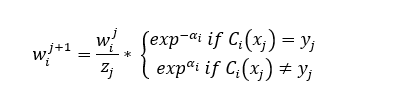



Note that for point j, if prediction under classifier i Ci(xj) = yj, then the weight is reduced in next iteration

Whereas if prediction is incorrect under classifier i, the weight is increased under next iteration

Zj is the normalization factor to ensure all weights sum to 1

The final prediction of each observation is made by aggregating the weighted average of the prediction made by each classifier. AdaBoost might result in overfitting. Hence, no. of trees should be checked and restricted.


## Parameters/Hyperparameters in adaboost

### Advantages and disadvantages of adaboost

Adv

1) Lesser number of hyperparameters, easier to tweak
2) Less prone to overfitting if stumps are chosen
3) Initially built for binary classification but now can be used for text/image classification also

Disadv

1) Very sensitive to noisy data and outliers
2) Slower than Xgboost


## Implementation in python from scratch

### Load the iris dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
import pandas
example = pandas.DataFrame(iris['data'])

In [18]:
example.columns = iris['feature_names']


In [21]:
example['target'] = iris['target']

In [22]:
example.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
## for simplicity, we exclude setosa (target = 1) and use only a binary classifier (versicolor or virginia)
example = example.loc[example['target'] != 0]

In [26]:
## convert 1,2 labels to 0,1 for ease
example.loc[example['target']==1, 'target'] = 0
example.loc[example['target']==2, 'target'] = 1

In [27]:
example['target'].value_counts()

0    50
1    50
Name: target, dtype: int64

In [29]:
## initially assign all weights to 1/N

example['probR1'] = 1/example.shape[0]

## Now, we want to use the weight vector to sample point from the data set with replacement 
## (There are two ways to implement an adaboost, either use a weight vector directly in the weak learner, or use a weight vector
## to sample points with replacement from the dataset) (we are using method 2 here)

import random
random.seed(5)
example1 = example.sample(len(example), replace = True, weights = example['probR1'])

In [30]:
example1.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'probR1'],
      dtype='object')

In [37]:
## Now fit the weak learner (decision tree with depth 1) assume the whole of example1 is taken as training data set for illustration
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 1)
clf = clf_gini.fit(example1[iris['feature_names']], example1['target'] )

In [41]:
example1['prediction'] = clf.predict(example1[iris['feature_names']])

In [42]:
error = sum(example1['probR1']*(example1['prediction'] != example1['target']))

In [44]:
## This is the average error of the whole classifier

In [46]:
import numpy as np
alpha = 0.5*np.log((1-error)/error)

In [48]:
np.log(10)

2.302585092994046

In [50]:
## now updat weights using alpha
## For misclassified records, use e^alpha, and for not misclassified, use e-alpha
import math
example1['mult'] = -1
example1.loc[example1['prediction'] != example1['target'], 'mult'] = 1
example1['mult'] = example1['mult'].apply(lambda x : math.exp(alpha*x))

In [51]:

example1['probR2'] = example1['probR1']*example1['mult']

In [52]:
## we have to normalize to 1

example1['probR2'] = example1['probR2']/(example1['probR2'].sum())

In [53]:
sum(example1['probR2'])

1.0000000000000016

In [ ]:
## repeat all steps above with updated sampling for n times


## The Math 


Final prediction/sign (weighted sum) = ∑ (αi* (predicted value at each iteration))

If Xi is the ith sample
Cm(Xi) = alpha1*h1(Xi) + alpha2*h2(Xi)... alpham*hm(Xi)
is the final prediction from adaboost,

where there are m weak learners h1...hm

The final class output for Xi is sign(Cm(Xi))

hk is trained using mistakes of hk-1

How do we get h at step t, and how do you generate alphas ? These are what are needed for final prediction

Assume we are at step m-1

So we already have Cm-1(X) =  alpha1*h1(X) + ... alpham-1*hm-1(X)

Now we have to get hm, and alpham

Cm(X) = Cm-1(X) + (alpham)*(hm(X))

Loss(Cm(X),Y) = sum(i=1 to n)(exp(-yiCm(Xi))) (summing exponential loss across all points)

               = sum(i=1 to n)  (exp(-yiCm-1(Xi)*exp(-alphamhm(X)yi))
               
    (exp(-yiCm-1(Xi) is fixed and cannot be optimized at current iteration -> so can be called wim (weight of mth classifier, ith point)        
    
    
 Goal to pick alpham and hm to minimize this loss function
 split the summation into points where yi=hm(Xi) (here the multiplicative term is exp(-alpham)
 and points where yi != hm(Xi) (here the multiplicative term is exp(alpham))
 
 by the nature of the exponential loss function, exp(alpham)> exp(-alpham) - not symmetric (assuming alpham > 0)
 )
 
 
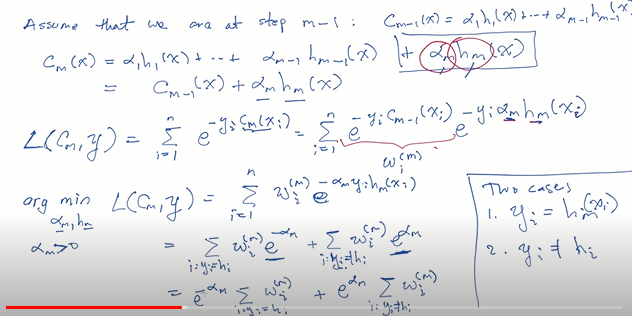
               
               
               

In the above loss, we have to pick hm and alpham


Picking hm :



The term driving the error above is the term on the right (y1 != hm(Xi))
So to find hm, we pick hm which minimizes the summation of weights term on the right 


Picking alpham

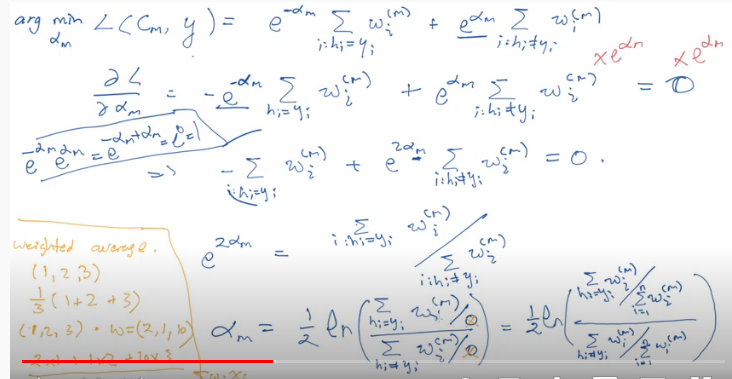

which is just 1/2*ln((1-e)/e) above


Now we derive expression for wt

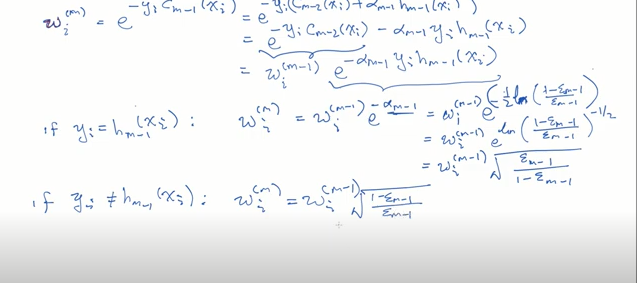


At step 1, initialize all weights randomly to 1/n where n is size of data set

Then update as follows

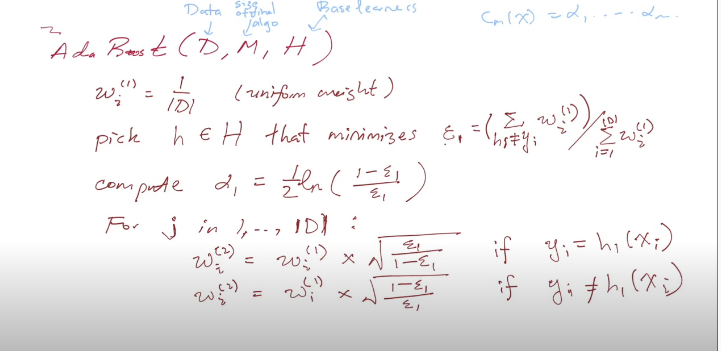

The derivation above assumes unnormalized weights. If we want to ensure normalized weights
ie for every m, sum(wim)=1, the algebra changes slightly

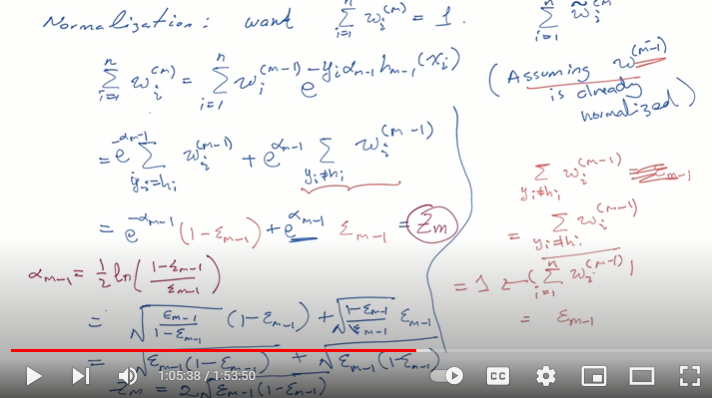



Therefore, in the weight update step,

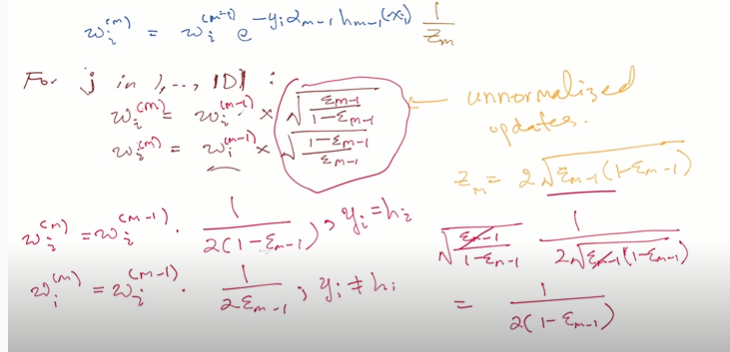

# Gradient Boosting

Again, an ensemble of weak prediction models,
A generalized boosting method compared to other boosting methods like adaboost, as it allows optimization using a differentiable loss function
 
The idea of gradient boosting originated in the observation by Leo Breiman that boosting can be interpreted as an optimization algorithm on a suitable cost function.
 
 

### Comparison to adaboost

1) The mathematical formulation is of course different, adaboost assumes an exponential loss function, and weights of every point are shrunk for the next classifier or increased depending on the previous classifier weight, and how well the current classifier fit. 
Gradient boosting uses a gradient optimization over the function space to find the optimal cost function

2) In adaboost, each step is typically a decision tree stump, including the first step

In gradient boosting, the first step is usually just a leaf (an average value for regression), subsequent steps are usually not stumps but trees with number of leaves restricted

3) In adaboost, the final tree is weighted (by alpha) sum of individual classifiers, where weights of each classifier (alpha) is different, higher alpha means that particular tree classifier had lower error and vice versa
In gradient boosting, the final tree is just a weighted sum of the individual classifiers (no different weights for each tree), where all the weights are the same, set to 0.1 or some hyperparameter

4)Theoretically, gradient boosting is a more general technique , and adaboost can be proven as a special case of gradient boosting under certain assumptions

###  High level description  - gradient boosting for regression

1) In regression the target is a continuous value. So start with a leaf which is the average of all target values in training data set as base prediction

2) Compute residuals1 = target - base prediction

3) Fit a small tree 1 (with no of nodes usually between 8-32) using features to predict residuals

The output of a leaf node will typically be average of all residuals which fall in that leaf node (If only one sample/residual falls in that node, it is that value itself, if 3 samples/residuals fall, it is the average of those 3 residuals)

4) new prediction = base prediction + nu * tree1 ,
where nu is a constant scaling factor (learning rate) to minimize overfitting on training data, which is usually same for every tree. Learning rate is a value between 0 and 1 

(Based on jerome friedman (boosting inventor) that lots of small steps in right direction while training gives better predictions on test set)

5) residuals2 = target - new prediction

6) Fit a small tree 2 using features to predict residuals 2

7) new prediction = base prediction + nu * tree1  + nu * tree2

8) Repeat steps from 5 to 7 till either maximum number of trees initially specified is reached OR adding new trees does not reduce significantly size of residuals


https://www.youtube.com/watch?v=3CC4N4z3GJc

###  Math  - gradient boosting for regression

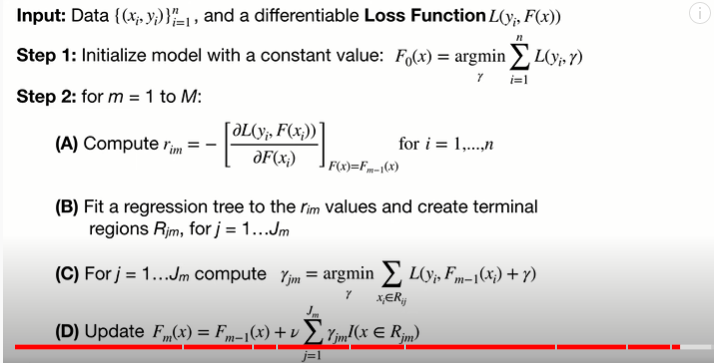



https://www.youtube.com/watch?v=2xudPOBz-vs


Looking at chart above, 

1) Input (xi, yi) is list of samples, i = 1 to n. Gradient boosting also needs a differentiable loss function
L(yi, F(xi))

In the case of regression, this loss function is usually MSE ie 0.5*(y - F(x)) ** 2

This is differentiable as we well know, the derivative of this loss wrt F(x) = -(y - F(x))
 = - residual
 
 
2) Step 1 : Initialization 

The model is initialized with a constant value 

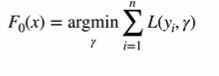


What does this mean ? You pick a value of gamma as FO(X) which minimizes the equation above

Given that we chose loss = sum over i=1:n ( 0.5*(yi - gamma) ** 2), if we solve this by differentiation, the gamma which minimizes this is the average of yi across all n


3) Step 2  - We start a for loop, and the same loop is repeated for each tree we build. The total number of trees is M 

For every tree

a)  First compute gradient of loss with respect to prediction, at the value of the previous prediction

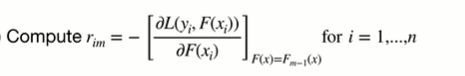

This term is where the name gradient boosting comes from as it requires a gradient

Note that this is similar to gradient descent, but not same, as derivative is wrt the prediction (the hypothesis function) itself, not the weights. Hence, it is a derivative over function space


Assume a MSE loss, for a single point, rim (residual of mth classifier at ith point) is just (yi - predictioni|m-1) {The residual at the ith point using the previous value of prediction}


If m = 1, the previous value of prediction is just FO(X) which is the average, otherwise it is the previous value in general


b) Once the residuals are obtained, the next step is to simply fit a tree or a model to the residuals from the step above.

The terminal regions Rjm for j = 1..Jm are nothing but the leaves of the tree. j is the jth leaf, m is the classifier m


c) 

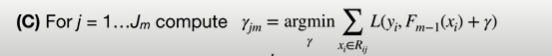


What does this mean ?

For every leaf node j in 1..Jm (through all leaves)

Compute a single output value gamma for that leaf node


If the leaf node has only one sample in in it, the gamma value if you do the math by differentiation is the residual itself


If the lead node has multiple samples in it , the gamma value on doing the math by differentiation is the average of the residuals of all samples in that leaf node


If your tree is this

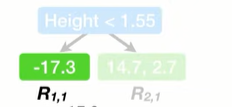




There are two leaf nodes. Each leaf node will have a final output value which is the average of all values in that leaf node

Leaf node 1 R11 will have value -17.3

Leaf node 2 R21 will have value 0.5*(2.7+14.7) = 8.7

That is exactly what the equation above says



d ) 


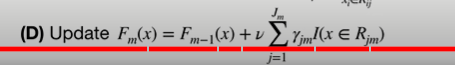


This is just the update step to get a new prediction 


For example, F1(x) = FO(X) + nu*(the tree built above)
is what this equation essentially says

nu is the learning rate, set to 0-1 as described above, usually 0.1-0.2 etc to avoid overfitting to training data








###  High level description  - gradient boosting for classification

1) In classification the target is a binary value. So start with a leaf which is the log odds of the GT as base prediction(Unlike regression where we take the average of continuous targets as base prediction, here the targets are 1/0. Log odds is the logistic regression equivalent of average in regular regression)

For example, in the data set of 6 examples, there are 4 1 and 2 0, log odds = log (p/1-p) 
= log(4/6 / (2/6)) = log(2) = 0.6973 (natural log). This is the base prediction in the log odds space


Convert from log odds to probability space by the logistic equation

p = e ** (log odds) / (1 + e ** log odds) = e ** (ln 2) / (1 + e ** ln (2)) = 2/3 = 0.666

For all samples


2) Compute residuals1 = target - base prediction. targets are either 1 or 0
base prediction are probabilities

Therefore, for example, if target is 1, and prediction probability is 0.666, then residual is (1-0.67) = 0.33

Similarly if target  is 0, residual is (0-0.67) = -0.67

3) Fit a small regression tree 1 (with no of nodes usually between 8-32) using features to predict residuals
(why regression tree even though this is a classification problem ? because the residuls are continuous variables

The output of a leaf node will typically be average of all residuals which fall in that leaf node . Unlike regression, we can't directly take an arithmetic average as the math won't work out

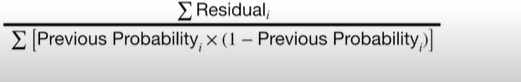


is the equation instead


For example, if there are two residuals in a particular leaf node, we add two values 

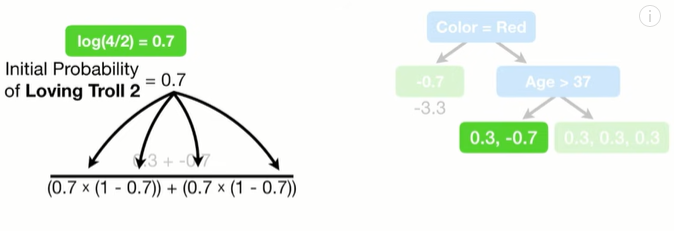



4) new prediction = base prediction + nu * tree1 ,
where nu is a constant scaling factor (learning rate) to minimize overfitting on training data, which is usually same for every tree. Learning rate is a value between 0 and 1 

(Based on jerome friedman (boosting inventor) that lots of small steps in right direction while training gives better predictions on test set)

This prediction is in the log odds space

Convert again to probability per sample by  p = e ** (log odds) / (1 + e ** log odds)

5) residuals2 = target - new probabilities

6) Fit a small tree 2 using features to predict residuals 2

7) new prediction = base prediction + nu * tree1  + nu * tree2

8) Repeat steps from 5 to 7 till either maximum number of trees initially specified is reached OR adding new trees does not reduce significantly size of residuals


https://www.youtube.com/watch?v=jxuNLH5dXCs

###  Math  - gradient boosting for classification (equations same as for regression above)

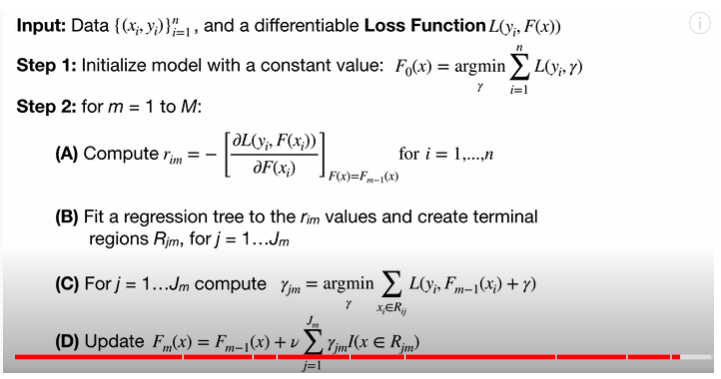

Looking at chart above, 

1) Input (xi, yi) is list of samples, i = 1 to n. Gradient boosting also needs a differentiable loss function
L(yi, F(xi))

In the case of classification, this loss function is the usual cross entropy

Loss = -(sum (yi * log(pi) + (1-yi) * log(1 - pi)))

Written in terms of log odds instead of probabilities, we know log odds = log (pi / (1-pi))

Therefore loss = - (sum (  yi * log oddsi + log(1 - pi)))

We know that pi = 1 / (1 + exp (- log odds))

Plugging that above, log (1 - pi) = log (exp -(log odds) / (1 + exp (-log odds))) = log (1 / 1 + exp(log odds))

Therefore , loss  = sum over i (-  yi * log odds + + log( 1 + exp(log odds)) in terms of log odds

now we check its differentiability, so we take derivative wrt the prediuction which is log odds

dL/(d log odds) = sum over i (- yi + exp(log odds) / (1 + exp (log odds))) which is nothing but sum over i 
(-yi + pi)

 = - residual (similar to regression where the loss function was different but the derivative was - residual )
 
 
2) Step 1 : Initialization 

The model is initialized with a constant value 

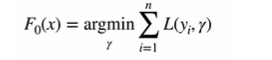

What does this mean ? You pick a value of gamma as FO(X) which minimizes the equation above

Given that we chose loss = sum over i=1:n (-  yi * log odds + + log( 1 + exp(log odds)), if we solve this by differentiation (set derivative which is sum over i (gamma - yi) to 0), the gamma which minimizes this is the average of yi across all n l for all n

We can now convert this to log odds space by taking log odds = log(p / 1-p)


3) Step 2  - We start a for loop, and the same loop is repeated for each tree we build. The total number of trees is M 

For every tree

a)  First compute gradient of loss with respect to prediction, at the value of the previous prediction

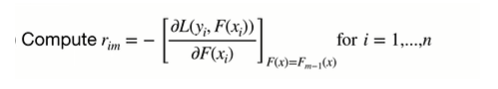

This term is where the name gradient boosting comes from as it requires a gradient

Note that this is similar to gradient descent, but not same, as derivative is wrt the prediction (the hypothesis function) itself, not the weights. Hence, it is a derivative over function space


as derived above, for a single point, rim (residual of mth classifier at ith point) is just (yi - probabilityi+m-1) {The residual at the ith point using the previous value of prediction}

for the first iteration, probabilityi|0 = gamma

y1 C {0,1}


If m = 1, the previous value of prediction is just FO(X) which is the average, otherwise it is the previous value in general


b) Once the residuals are obtained, the next step is to simply fit a tree or a model to the residuals from the step above.

The terminal regions Rjm for j = 1..Jm are nothing but the leaves of the tree. j is the jth leaf, m is the classifier m


c) 

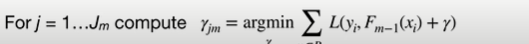


What does this mean ?

For every leaf node j in 1..Jm (through all leaves)

Compute a single output value gamma for that leaf node


If the leaf node has only one sample in in it, the gamma value if you do the math by differentiation is the residual itself


If the lead node has multiple samples in it , the gamma value on doing the math by differentiation is the average of the residuals of all samples in that leaf node (here, we do a taylor expansion to keep the math simple)


If your tree is this

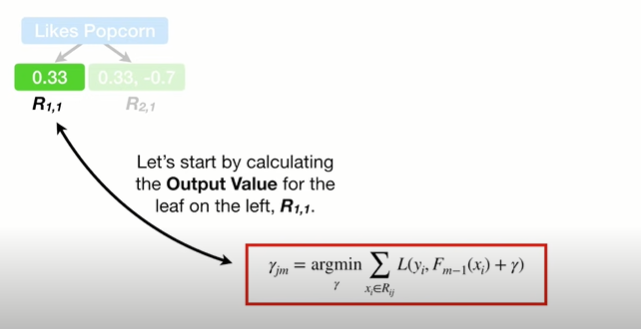


Only 1 value in terminal node


Expanding loss with equation above, and taking summation out because there is only 1 value in the leaf node in this example


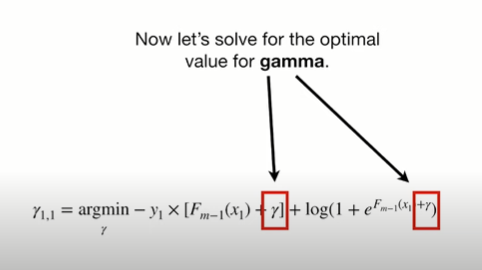




Since differentiation to find gamma is complicated,

we do a taylor's expansion of this loss for two terms and then differentiate

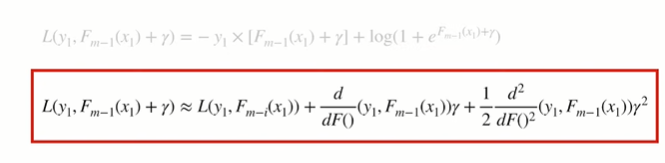


now when we differentiate this and set to 0 to solve for gamma which minimizes this , we get

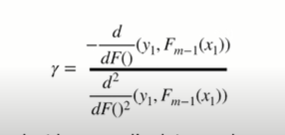







The numerator is just - (- yi + pi) which is (yi - pi) which is the residual itself


The denominator is the derivative of the first derivative which is the derivative of (-yi + pi)
which in terms of log odds is (-yi + exp(log odds) / (1 + exp(log odds)))
with respect to log odds

which will give you exp(log odds) / (1 + exp(log odds)) ** 2 which is nothing but pi*(1-pi)


Therefore, gamma = residual/(pi*(1-pi)) if there is only one sample in the leaf node


If there is more than one sample in leaf node, do similar algebra to prove it gamma = 
sum over values in leaf node (residual) / sum over values in leaf node (pi*(1-pi))


d)

Now that we have all gammas for every leaf in tree, 

we do 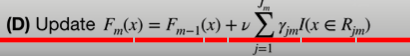

This is just the update step to get a new prediction 


For example, F1(x) = FO(X) + nu*(the tree built above)
is what this equation essentially says

nu is the learning rate, set to 0-1 as described above, usually 0.1-0.2 etc to avoid overfitting to training data


Now we get  updated predictions in the log odds space

Convert to probability by taking exp(log odds) / (1 + exp ()







## References

1) https://analyticsindiamag.com/a-hands-on-guide-to-hybrid-ensemble-learning-models-with-python-code/
2) https://analyticsindiamag.com/primer-ensemble-learning-bagging-boosting/
3) https://www.kaggle.com/code/prashant111/bagging-vs-boosting/notebook
4) https://analyticsindiamag.com/adaboost-vs-gradient-boosting-a-comparison-of-leading-boosting-algorithms/#:~:text=AdaBoost%20is%20the%20first%20designed,Boosting%20more%20flexible%20than%20AdaBoost.
5) https://www.analyticsvidhya.com/blog/2020/10/adaboost-and-gradient-boost-comparitive-study-between-2-popular-ensemble-model-techniques/
6) https://blog.paperspace.com/adaboost-optimizer/#:~:text=AdaBoost%20is%20an%20ensemble%20learning,turn%20them%20into%20strong%20ones.
7) https://datascience.stackexchange.com/questions/39193/adaboost-vs-gradient-boosting
8) https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html
9) https://www.analyticsvidhya.com/blog/2021/04/how-the-gradient-boosting-algorithm-works/
10) https://towardsdatascience.com/a-comprehensive-mathematical-approach-to-understand-adaboost-f185104edced#:~:text=The%20error%20function%20that%20AdaBoost%20uses%20is%20an%20exponential%20loss%20function.&text=First%20we%20find%20the%20products,the%20error%20at%20iteration%20m.
11) http://www.inf.fu-berlin.de/inst/ag-ki/adaboost4.pdf
12) https://www.youtube.com/watch?v=m-qAAB_S414
13) https://stats.stackexchange.com/questions/297103/derivation-of-adaboost-r2-algorithm
14) https://www.researchgate.net/publication/4116773_AdaBoostRT_A_boosting_algorithm_for_regression_problems
15) https://koalaverse.github.io/machine-learning-in-R/gradient-boosting-machines.html
16) https://www.youtube.com/watch?v=3CC4N4z3GJc